In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### <a href="https://klue-benchmark.com/">KLUE</a>
- 연구용 데이터 셋


In [ ]:
# read_json 으로 url 불러오기
# 연합뉴스 기사 타이틀
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)
df.head()


,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,IT과학,사회,"{'annotators': ['14', '13', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00
3,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,IT과학,사회,"{'annotators': ['16', '11', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.28. 오전 9:54
4,ynat-v1_train_00004,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화,생활문화,"{'annotators': ['03', '02', '12'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.03. 오전 7:05


In [4]:
# 행,열 파악

df.shape

(45678, 7)

In [12]:
# 중복 데이터가 있는지 확인

df.duplicated(subset=['title'])



0        False
1        False
2        False
3        False
4        False
         ...  
45673    False
45674    False
45675    False
45676    False
45677    False
Length: 45678, dtype: bool

In [15]:
# 결측치 확인

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45678 entries, 0 to 45677
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   guid                      45678 non-null  object
 1   title                     45678 non-null  object
 2   predefined_news_category  45678 non-null  object
 3   label                     45678 non-null  object
 4   annotations               45678 non-null  object
 5   url                       45678 non-null  object
 6   date                      45678 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

### 텍스트 길이 분석

In [16]:
# 타이틀 길이를 구해서 새로운 컬럼(title_len) 생성
df['title_len'] = df['title'].str.len()

df['title_len']


0        26
1        23
2        27
3        31
4        30
         ..
45673    28
45674    30
45675    32
45676    29
45677    32
Name: title_len, Length: 45678, dtype: int64

In [17]:
# 토큰 개수(공백 기준으로) : title_token_count

df['title_token_count'] = df['title'].str.split().str.len()


df['title_token_count']


0         7
1         5
2         7
3        10
4         9
         ..
45673     7
45674     9
45675     8
45676     8
45677     8
Name: title_token_count, Length: 45678, dtype: int64

In [19]:
# 확인
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,26,7
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,23,5


In [20]:
# 타이틀 길이와 토근 개수 컬럼만으로 기술통계 요약 정보 보기

df[['title_len', 'title_token_count']].describe()



,title_len,title_token_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


In [21]:
# 텍스트 길이가 가장 짧은 기사는?
df[df['title_len'] == 4]


,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
4343,ynat-v1_train_04343,봄 산책,생활문화,생활문화,"{'annotators': ['12', '10', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.05. 오후 1:51,4,2


In [34]:
# 텍스트 길이가 가장 짧은 기사는?
df[df['title_len'] == 44]


,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


<Axes: xlabel='title_token_count', ylabel='Count'>

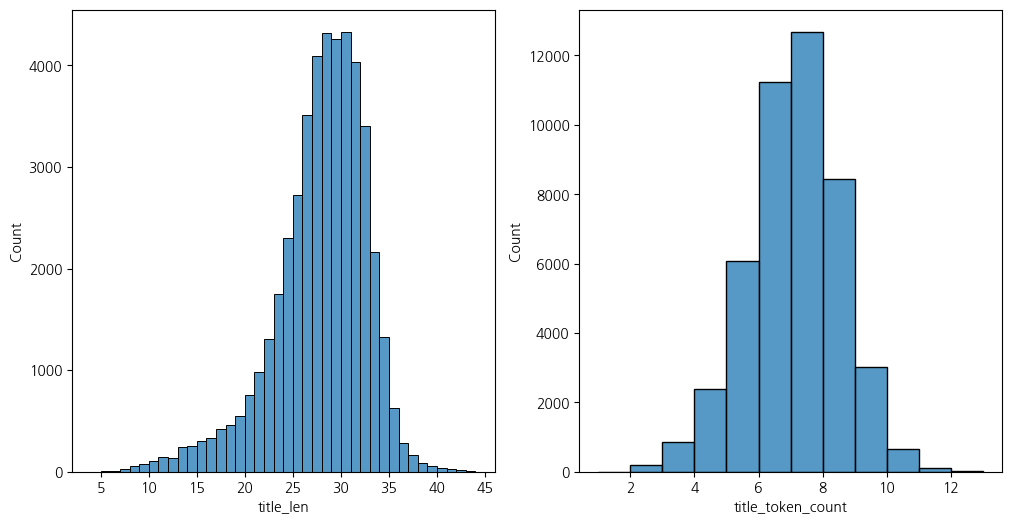

In [22]:
# 히스토그램
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df, x='title_len', ax=ax[0], binwidth=1)
sns.histplot(data=df, x='title_token_count', ax=ax[1], binwidth=1)

In [ ]:
fig = make_subplots(rows=1,cols=2, subplot_titles=['title_len', 'title_token_count'])

fig.add_trace(go.Histogram(x=df['title_len'], showlegend=False), row=1, col=1)
fig.add_trace(go.Histogram(x=df['title_token_count'], showlegend=False), row=1, col=2)

### 워드 클라우드 시각화
- https://github.com/amueller/word_cloud

  


In [41]:
# 시리즈 형태로 되어 있는 건  안됨
# df['title'] title 모두 연결
from wordcloud import WordCloud
news_title = " ".join(df['title'])

news_title[:100]



'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 내년부터 국가RD 평가 때 논문건수는 반영 않는다 김명자 신임 과총 회장 원로와 젊은 과'

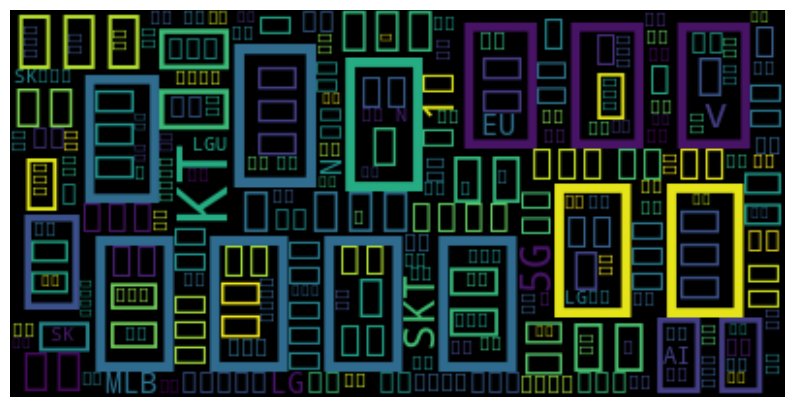

In [ ]:


wc = WordCloud()
wc.generate(news_title)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

plt.show()

In [94]:
# 워드 클라우드 작성 함수
font_path = "C:/Windows/Fonts/malgun.ttf"


def display_word_cloud(data, width=1200, height=500):
    wc = WordCloud(
        font_path=font_path,
        width=width,
        height=height,
        random_state=42,
        background_color="white",
    ).generate(data)
    

    plt.figure()
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")

    plt.show()

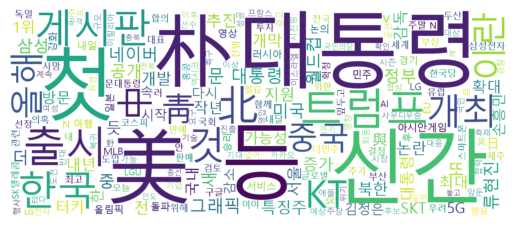

In [95]:
display_word_cloud(news_title)

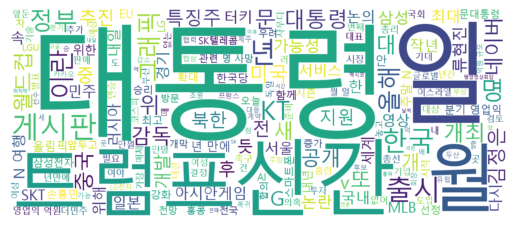

In [176]:
# 불용어 처리까지 들어간 워드 클라우드 함수
korean_stopwords = {
    "있다", "하다", "되다", "수", "이", "것", "등", "더", "저", "그", "그리고", "하지만", "또한", "에서", "으로", "에게", "입니다", "첫"
}

# 워드 클라우드 작성 함수
font_path = "C:/Windows/Fonts/malgun.ttf"


def display_word_cloud(data, width=1200, height=500, mask=None):
    wc = WordCloud(
        font_path=font_path,
        width=width,
        height=height,
        mask=mask,
        random_state=42,
        background_color="white",
        stopwords=korean_stopwords
    ).generate(data)
    

    plt.figure()
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")

    plt.show()
display_word_cloud(news_title)

### 레이블

In [99]:
# 레이블 파악
df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [100]:
# 레이블 별 개수 파악
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [108]:
# 세계 기사만 가져오기
subject_title = " ".join(df.loc[df['label']== '세계', 'title'])

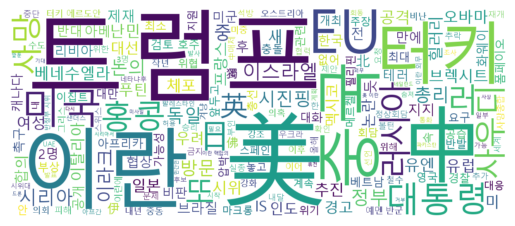

In [109]:
# 세계 기사 워드클라우드

display_word_cloud(subject_title)

### [실습] 생활문화 레이블 가져와서 워드 클라우드 작성하기

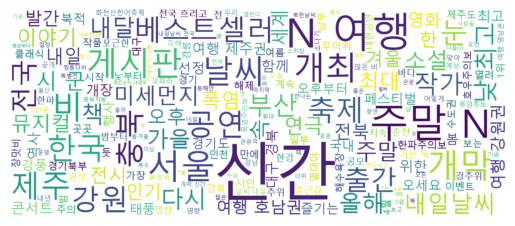

In [110]:
subject_title = " ".join(df.loc[df['label']== '생활문화', 'title'])
display_word_cloud(subject_title)

### 정규표현식

In [123]:

df['title2'] = df['title'].str.replace(r"\d","",regex=True) # 숫자 제외
df['title3'] = df['title'].str.replace(r"[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 a-zA-Z]","",regex=True) # 한자 제외(영어, 한글만)


df[['title2', 'title3']]



,title2,title3
0,유튜브 내달 일까지 크리에이터 지원 공간 운영,유튜브 내달 일까지 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,어버이날 맑다가 흐려져남부지방 옅은 황사
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간,회색인간 작가 김동식 양심고백 등 새 소설집 권 출간
...,...,...
45673,사우디 아람코 주요 석유시설·유전 드론 공격에 화재,사우디 아람코 주요 석유시설유전 드론 공격에 화재
45674,박기원 감독 눈치 보지 말고…비예나 눈치 본 건 아닌데,박기원 감독 눈치 보지 말고비예나 눈치 본 건 아닌데
45675,아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도 ...,아시안게임 첫 경기 앞둔 라건아 인도네시아 팬이라도
45676,트럼프 미중 무역협상 단계 합의 서명식 가질 것종합,트럼프 미중 무역협상 단계 합의 서명식 가질 것종합


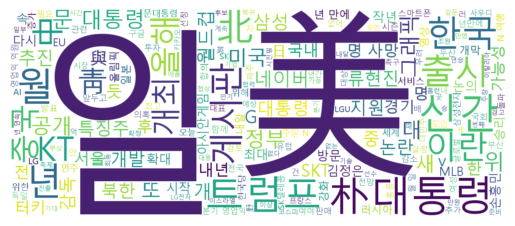

In [124]:
news_title = " ".join(df['title2'])
display_word_cloud(news_title)

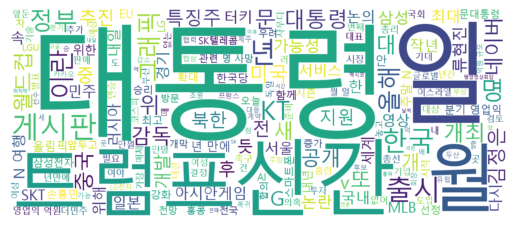

In [125]:
news_title = " ".join(df['title3'])
display_word_cloud(news_title)

## 형태소 분석기로 특정 품사만 추출하기

### Pecab
- 일본어 형태소 분석기 Mecab 를 한국어 형태소 분석기로 작성
- https://github.com/hyunwoongko/pecab

In [127]:
# !pip install pecab
!pip install tqdm


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
from pecab import PeCab

pecab = PeCab()


In [137]:
# 명사 추출

pecab.nouns("나는 명사이고 너는 대명사야")

['나', '명사', '너', '대명사']

In [139]:
# 기사 제목 명사 추출

pecab.nouns(df.loc[5792, 'title'])

['美', '기준', '금리', '인상', '내년', '차례', '인상', '시사', '종합', '보']

In [140]:
df.loc[5792, 'title']

'美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보'

In [153]:
# 사회 기사 타이틀 명사 추출
df_society = df.loc[df['label'] == '사회'].sample(1000, random_state=42)
df_society.head()


,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count,title3,title2
45317,ynat-v1_train_45317,국가인재원 나라배움터 이러닝 올해 학습서비스 시작,정치,사회,"{'annotators': ['16', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.02.10. 오후 12:00,27,6,국가인재원 나라배움터 이러닝 올해 학습서비스 시작,국가인재원 나라배움터 이러닝 올해 학습서비스 시작
17300,ynat-v1_train_17300,의장석 점거·몸싸움·욕설까지…동물국회 재연 아수라장 국회종합3보,정치,사회,"{'annotators': ['03', '09', '11'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.12.27. 오후 10:06,35,5,의장석 점거몸싸움욕설까지동물국회 재연 아수라장 국회종합보,의장석 점거·몸싸움·욕설까지…동물국회 재연 아수라장 국회종합보
20660,ynat-v1_train_20660,양제츠 자리 안내하는 정의용 실장,정치,사회,"{'annotators': ['02', '14', '12'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.03.29. 오후 4:37,18,5,양제츠 자리 안내하는 정의용 실장,양제츠 자리 안내하는 정의용 실장
6542,ynat-v1_train_06542,헌재 건강기능식품 광고 사전 심의는 사전검열…위헌,사회,사회,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.06.28. 오후 3:41,27,6,헌재 건강기능식품 광고 사전 심의는 사전검열위헌,헌재 건강기능식품 광고 사전 심의는 사전검열…위헌
11095,ynat-v1_train_11095,거래소 안랩 불성실 공시법인 미지정,경제,사회,"{'annotators': ['13', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.11.02. 오후 6:10,19,5,거래소 안랩 불성실 공시법인 미지정,거래소 안랩 불성실 공시법인 미지정


In [158]:
# df_society['title_nouns'] = df_society['title'].map(lambda x:pecab.nouns(x))

from tqdm import tqdm

tqdm.pandas()
df_society["title_nouns"] = df_society["title"].progress_map(lambda x:" ".join(pecab.nouns(x)))


# df_society

100%|██████████| 1000/1000 [00:00<00:00, 128439.00it/s]


In [ ]:
df_society.head()

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count,title3,title2,title_nouns
45317,ynat-v1_train_45317,국가인재원 나라배움터 이러닝 올해 학습서비스 시작,정치,사회,"{'annotators': ['16', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.02.10. 오후 12:00,27,6,국가인재원 나라배움터 이러닝 올해 학습서비스 시작,국가인재원 나라배움터 이러닝 올해 학습서비스 시작,국가 재원 나라 배움터 러닝 올해 학습 서비스 시작
17300,ynat-v1_train_17300,의장석 점거·몸싸움·욕설까지…동물국회 재연 아수라장 국회종합3보,정치,사회,"{'annotators': ['03', '09', '11'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.12.27. 오후 10:06,35,5,의장석 점거몸싸움욕설까지동물국회 재연 아수라장 국회종합보,의장석 점거·몸싸움·욕설까지…동물국회 재연 아수라장 국회종합보,장석 점거 몸싸움 욕설 동물 국회 재연 아수라장 국회 종합 보
20660,ynat-v1_train_20660,양제츠 자리 안내하는 정의용 실장,정치,사회,"{'annotators': ['02', '14', '12'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.03.29. 오후 4:37,18,5,양제츠 자리 안내하는 정의용 실장,양제츠 자리 안내하는 정의용 실장,양제츠 자리 안내 정의 실장
6542,ynat-v1_train_06542,헌재 건강기능식품 광고 사전 심의는 사전검열…위헌,사회,사회,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.06.28. 오후 3:41,27,6,헌재 건강기능식품 광고 사전 심의는 사전검열위헌,헌재 건강기능식품 광고 사전 심의는 사전검열…위헌,건강 기능 식품 광고 사전 심의 사전 검열 위
11095,ynat-v1_train_11095,거래소 안랩 불성실 공시법인 미지정,경제,사회,"{'annotators': ['13', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.11.02. 오후 6:10,19,5,거래소 안랩 불성실 공시법인 미지정,거래소 안랩 불성실 공시법인 미지정,거래소 안랩 성실 공시 법인 미 지정


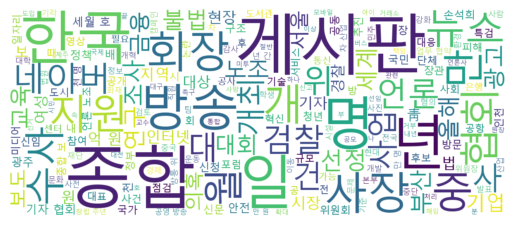

In [160]:
df_society['title_nouns']

# 세계 기사 중 명사 추출 후 워드 클라우드 작성
display_word_cloud(" ".join(df_society['title_nouns']))

## 워드 클라우드 마스크 처리
- https://github.com/amueller/word_cloud/blob/main/examples/masked.py

In [172]:
# 마스크 이미지 다운로드

import requests
from PIL import Image

mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

res = requests.get(mask_img_path)

if res.status_code == 200:
    with open as f:
        ("data/mask_img.png" )


TypeError: 'function' object does not support the context manager protocol

In [173]:
apple_img = np.array(Image.open("./data/apple_img.png"))

In [ ]:
display_word_cloud(" ".join(df_society['title_nouns']))

In [1]:
mask_img_path ='https://thepracticaldev.s3.amazonaws.com/i/u6otn211fuhgzwtpuivb.png'

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 141737.77it/s]


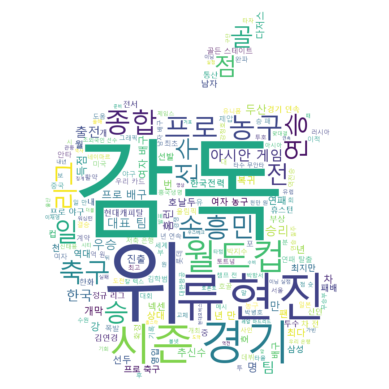

In [177]:
df_sports=df.loc[df['label']== '스포츠'].sample(1000, random_state=42)
tqdm.pandas()
df_sports['title_nouns'] = df_sports['title'].progress_map(lambda x: " ".join(pecab.nouns(x)))

display_word_cloud(data=" ".join(df_sports['title_nouns']), mask=apple_img)
